## Small molecule docking with plex

In this tutorial we perform small molecule docking with **plex**.

There are multiple reasons we believe plex is a new standard for computational biology 🧫:
1. with a simple python interface, running containerised tools with your data is only a few commands away
2. the infrastructure of the compute network is fully open source - use the public network or work with us to set up your own node
3. every event on the compute network is tracked - no more results are lost in an interactive compute session. You can base your decisions and publications on fully reproducible results.
4. we made adding new tools to the network as easy as possible - moving your favorite tool to PLEX is one JSON document away.

In the following tutorial, we illustrate how plex can be used to conduct small molecule binding studies to explore potential drug interactions with proteins. We demonstrate this with [Equibind](https://hannes-stark.com/assets/EquiBind.pdf).

We will also walk through the process of minting a ProofOfScience NFT. These tokens represent on-chain, verifiable records of the compute job and its input/output data. This enables reproducible scientific results.

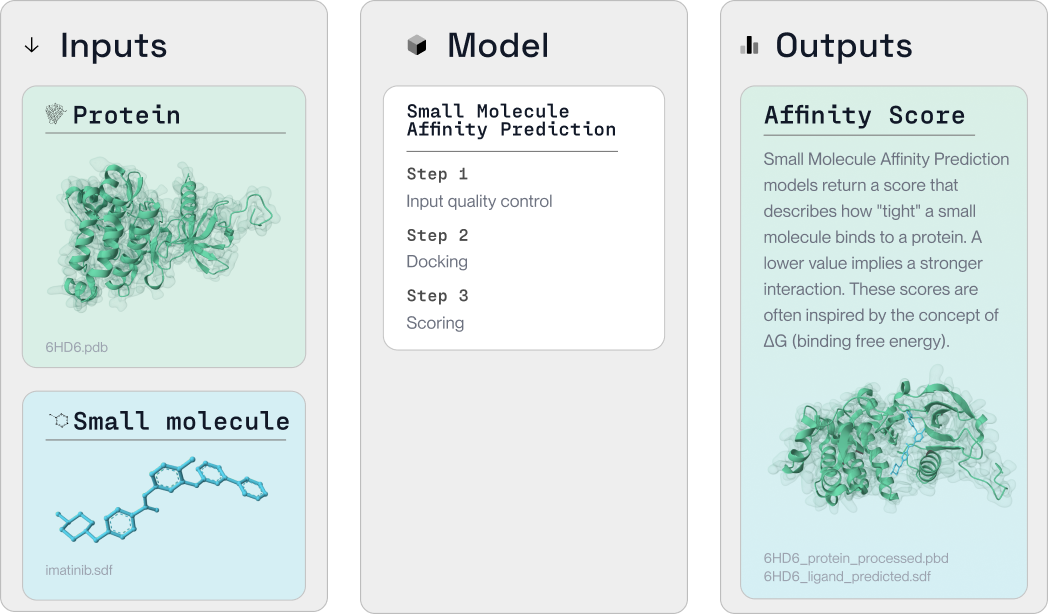

## Install plex

In [ ]:
!pip install PlexLabExchange

Then, create a directory where we can save our project files.

In [ ]:
import os

cwd = os.getcwd()
!mkdir project

dir_path = f"{cwd}/project"

## Download small molecule and protein data

We'll download the small molecule `.sdf` and protein `.pdb` we want to dock with Equibind.

In [ ]:
# small molecule
!wget https://raw.githubusercontent.com/labdao/plex/main/testdata/binding/abl/ZINC000003986735.sdf -O {dir_path}/ZINC000003986735.sdf
# protein
!wget https://raw.githubusercontent.com/labdao/plex/main/testdata/binding/abl/7n9g.pdb -O {dir_path}/7n9g.pdb

## Small molecule docking

With the small molecule and protein files downloaded, we can now use Equibind to run a docking simulation.

In [ ]:
from plex import CoreTools, plex_init

protein_path = [f"{dir_path}/7n9g.pdb"]
small_molecule_path = [f"{dir_path}/ZINC000003986735.sdf"]

initial_io_cid = plex_init(
    CoreTools.EQUIBIND.value,
    protein=protein_path,
    small_molecule=small_molecule_path,
)

This code initiates the docking process. We'll need to run it to complete the operation.

In [ ]:
from plex import plex_run

completed_io_cid, io_local_filepath = plex_run(initial_io_cid, dir_path)

After the job is complete, we can retrieve and view the results. The state of each object is written in a JSON object. Every file has a unique content-address.

In [ ]:
import json

with open(io_local_filepath, 'r') as f:
  data = json.load(f)
  pretty_data = json.dumps(data, indent=4, sort_keys=True)
  print(pretty_data)

This output provides us with key information about the small molecule-protein interaction. The "best_docked_small_molecule" represents the most likely interaction between the protein and the small molecule, which can inform subsequent analysis and experiments.

The results can also be viewed using an IPFS gateway. Below, the state of the IO JSON is read using the ipfs.io gateway.

**Note:** Depending on how long it takes for the results to propagate to the ipfs.io nodes, the data may not be available immediately. The results can also be viewed on IPFS Desktop or by accessing IPFS through the Brave browser (ipfs://completed_io_cid)

In [ ]:
print(f"View this result on IPFS: https://ipfs.io/ipfs/{completed_io_cid}")

# Visualize the small molecule docking

In [ ]:
from plex import plex_vectorize

results = plex_vectorize(completed_io_cid, CoreTools.EQUIBIND.value)

best_docked_small_molecule_path = results['best_docked_small_molecule']['filePaths'][0]
best_docked_small_molecule_cid = results['best_docked_small_molecule']['cidPaths'][0]

print(results)
print(best_docked_small_molecule_path)
print(best_docked_small_molecule_cid)

In [ ]:
!pip install py3Dmol

In [ ]:
import py3Dmol

def show_pdb_and_sdf(pdb_file, sdf_file):
    viewer = py3Dmol.view()

    # Add PDB model
    with open(pdb_file, 'r') as f:
        viewer.addModel(f.read(), 'pdb')

    # Add SDF model
    with open(sdf_file, 'r') as f:
        viewer.addModel(f.read(), 'sdf')

    # Set style for the visualization
    viewer.setStyle({'model':0}, {'cartoon': {'color':'spectrum'}})
    viewer.setStyle({'model':1}, {'stick': {}})

    viewer.zoomTo()
    viewer.show()

show_pdb_and_sdf(results['protein']['filePaths'][0], best_docked_small_molecule_path)

## Mint a ProofOfScience NFT

We can now mint a ProofOfScience token by providing the IPFS CID of the completed IO JSON to the `plex_mint` function.

In [ ]:
os.environ["RECIPIENT_WALLET"] = "" # enter your wallet address

In [ ]:
from plex import plex_mint

# using the autotask webhook enables gasless minting
os.environ["AUTOTASK_WEBHOOK"] = "https://api.defender.openzeppelin.com/autotasks/e15b3f39-28f8-4d30-9bf3-5d569bdf2e78/runs/webhook/8315d17c-c493-4d04-a257-79209f95bb64/2gmqi9SRRAQMoy1SRdktai"

plex_mint(completed_io_cid)

Congratulations on making it through this tutorial! If you'd like to stay up to date with LabDAO, please consider signing up for our [newsletter]().